# 0. Preparação do Ambiente

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Loading and Cleaning

## Pre-Cleaning

In [75]:
data = pd.read_feather('credit_scoring.ftr')

In [76]:
data.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [77]:
data.drop_duplicates(inplace=True)
data.drop(columns='index', inplace=True)
print(data.shape)

(280339, 14)


In [78]:
null_counts = data.isnull().sum()
missing_counts = data.isna().sum()

print('Null Data')
print(null_counts)

Null Data
data_ref                     0
sexo                         0
posse_de_veiculo             0
posse_de_imovel              0
qtd_filhos                   0
tipo_renda                   0
educacao                     0
estado_civil                 0
tipo_residencia              0
idade                        0
tempo_emprego            47609
qt_pessoas_residencia        0
renda                        0
mau                          0
dtype: int64


In [79]:
print('Missing Data')
print(missing_counts)

Missing Data
data_ref                     0
sexo                         0
posse_de_veiculo             0
posse_de_imovel              0
qtd_filhos                   0
tipo_renda                   0
educacao                     0
estado_civil                 0
tipo_residencia              0
idade                        0
tempo_emprego            47609
qt_pessoas_residencia        0
renda                        0
mau                          0
dtype: int64


## Outliers

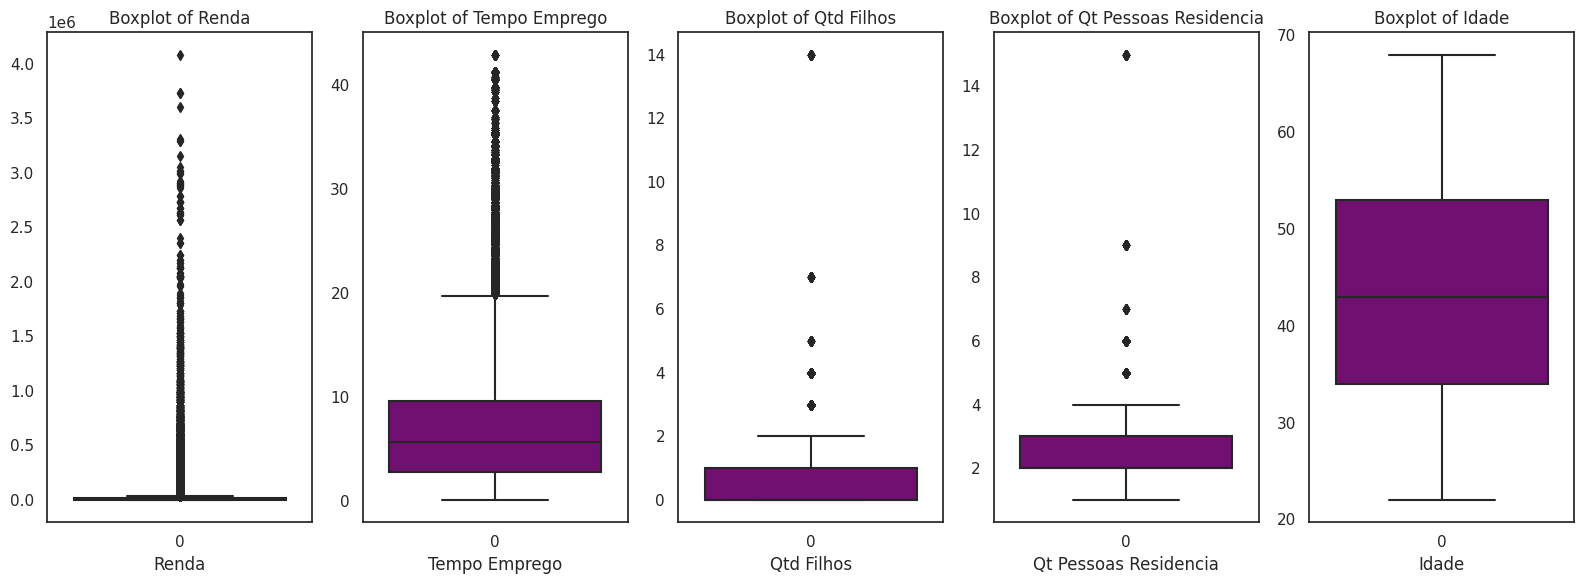

In [80]:
# Set the color you want (e.g., 'purple')
box_color = 'purple'

# Create a figure with four subplots
plt.figure(figsize=(16, 6))

# First subplot for 'renda'
plt.subplot(1, 5, 1)
sns.boxplot(data['renda'], color=box_color)
plt.title('Boxplot of Renda')
plt.xlabel('Renda')

# Second subplot for 'tempo_emprego'
plt.subplot(1, 5, 2)
sns.boxplot(data['tempo_emprego'], color=box_color)
plt.title('Boxplot of Tempo Emprego')
plt.xlabel('Tempo Emprego')

# Third subplot for 'qtd_filhos'
plt.subplot(1, 5, 3)
sns.boxplot(data['qtd_filhos'], color=box_color)
plt.title('Boxplot of Qtd Filhos')
plt.xlabel('Qtd Filhos')

# Fourth subplot for 'qt_pessoas_residencia'
plt.subplot(1, 5, 4)
sns.boxplot(data['qt_pessoas_residencia'], color=box_color)
plt.title('Boxplot of Qt Pessoas Residencia')
plt.xlabel('Qt Pessoas Residencia')

# Fith subplot for 'idade'
plt.subplot(1, 5, 5)
sns.boxplot(data['idade'], color=box_color)
plt.title('Boxplot of Idade')
plt.xlabel('Idade')

# Adjust layout
plt.tight_layout()
# Show the plots
plt.show()

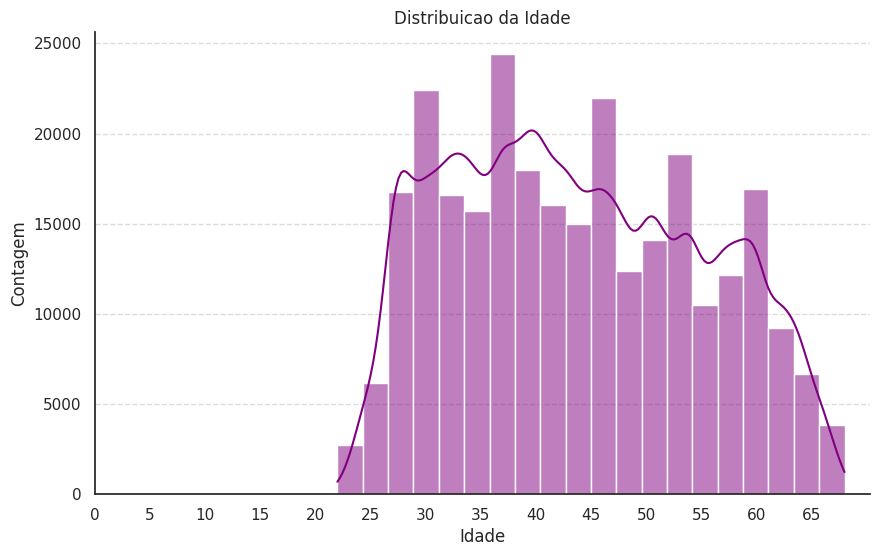

In [81]:
# Set the color you want (e.g., 'blue')
hist_color = 'purple'

# Set seaborn style
sns.set(style='white')

# Create a histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data['idade'], color=hist_color, bins=20, kde=True)  # With KDE for a smoothed line
plt.title('Distribuicao da Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.xticks(range(0, max(data['idade']) + 1, 5))  # Customize x-axis ticks

# Add grid and remove right and top spines
sns.despine()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout
plt.show()

## Amostragem

In [83]:
# Get the maximum date in the dataset
max_date = data['data_ref'].max()

# Calculate the start date for the last three months
start_date = max_date - pd.DateOffset(months=3)

# Filter the data for the last three months
# Validation out of time (oot)
data_oot = data[(data['data_ref'] >= start_date) & (data['data_ref'] <= max_date)]

# Filter the rows to be removed (last three months data)
rows_to_remove = data[(data['data_ref'] >= start_date) & (data['data_ref'] <= max_date)].index

# Remove the rows from the original dataset
data_cleaned = data.drop(rows_to_remove)

# Data Exploration

## Descritiva básica univariada

In [95]:
# Get the count of rows for each month in 'data_ref'
monthly_counts = data_cleaned['data_ref'].dt.to_period('M').value_counts().sort_index()

# Define a list of month names
month_names = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov"]

# Print the number of rows for each month
print("Numero de registros para cada mes:")
for period, count in monthly_counts.items():
    print(f"{month_names[period.month - 1]} {period.year}: {count}")

Numero de registros para cada mes:
Jan 2015: 20066
Fev 2015: 19428
Mar 2015: 18714
Abr 2015: 17993
Mai 2015: 17398
Jun 2015: 17091
Jul 2015: 16998
Ago 2015: 17100
Set 2015: 17417
Out 2015: 17948
Nov 2015: 18793


In [96]:
# Basic univariate analysis for quantitative variables
quantitative_vars = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

# Basic univariate analysis for categorical variables
categorical_vars = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']